# Fashion MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


> ## 2) Visualization

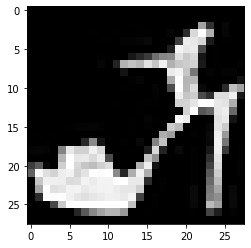

In [6]:
import matplotlib.pyplot as plt

shoes = X_train[9]
plt.imshow(shoes, cmap='gray')
plt.show()

In [7]:
import numpy as np

np.set_printoptions(linewidth=150)
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0   0 235 24

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [10]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [11]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [12]:
print(X_train[9])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.
 0.64313725 0.19607843 0.         0.02745098 0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.         0.         0.0

> ## 2) One Hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes

In [23]:
from tensorflow.keras import models, layers

fashion_mnist = models.Sequential()
fashion_mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
fashion_mnist.add(layers.Dense(256, activation='relu'))
fashion_mnist.add(layers.Dense(10, activation='softmax'))

* 모델 구조 확인

In [24]:
fashion_mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [25]:
fashion_mnist.compile(loss = 'categorical_crossentropy',
                      optimizer = 'rmsprop',
                      metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [27]:
%%time

Hist_fashion_mnist = fashion_mnist.fit(X_train, y_train,
                                       epochs = 100,
                                       batch_size = 128,
                                       validation_split = 0.2)


Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.5800 - accuracy: 0.7892 - val_loss: 0.4658 - val_accuracy: 0.8369
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3869 - accuracy: 0.8562 - val_loss: 0.3927 - val_accuracy: 0.8553
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3396 - accuracy: 0.8739 - val_loss: 0.3584 - val_accuracy: 0.8677
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3134 - accuracy: 0.8850 - val_loss: 0.3590 - val_accuracy: 0.8671
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2949 - accuracy: 0.8906 - val_loss: 0.3387 - val_accuracy: 0.8826
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2795 - accuracy: 0.8955 - val_loss: 0.3314 - val_accuracy: 0.8898
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2647 - accuracy: 0.9010 - val_loss: 0.3301 - val_accuracy: 0.8871

> ## 4) 학습 결과 시각화

* Loss Visualization

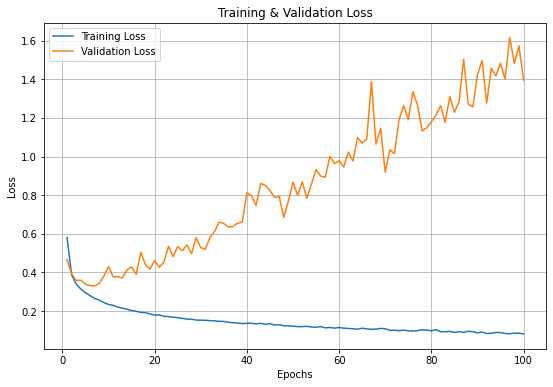

In [29]:
import matplotlib.pyplot as plt


epochs = range(1, len(Hist_fashion_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_fashion_mnist.history['loss'])
plt.plot(epochs, Hist_fashion_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [31]:
loss, accuracy = fashion_mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.6093 - accuracy: 0.8900
Loss = 1.60925
Accuracy = 0.89000


> ## 6) Model Predict

* Probability

In [32]:
np.set_printoptions(suppress=True, precision=9)

print(fashion_mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


* Class

In [34]:
print(np.argmax(fashion_mnist.predict(X_test[:1,:])))

9


# 
# 
# 
# The End
# 
# 
# 